# An Analysis of Global Sectoral Trade Networks

In [3]:
import networkx as nx
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import os

os.chdir('/Users/Carla/Documents/Network Analysis/trade-networks')

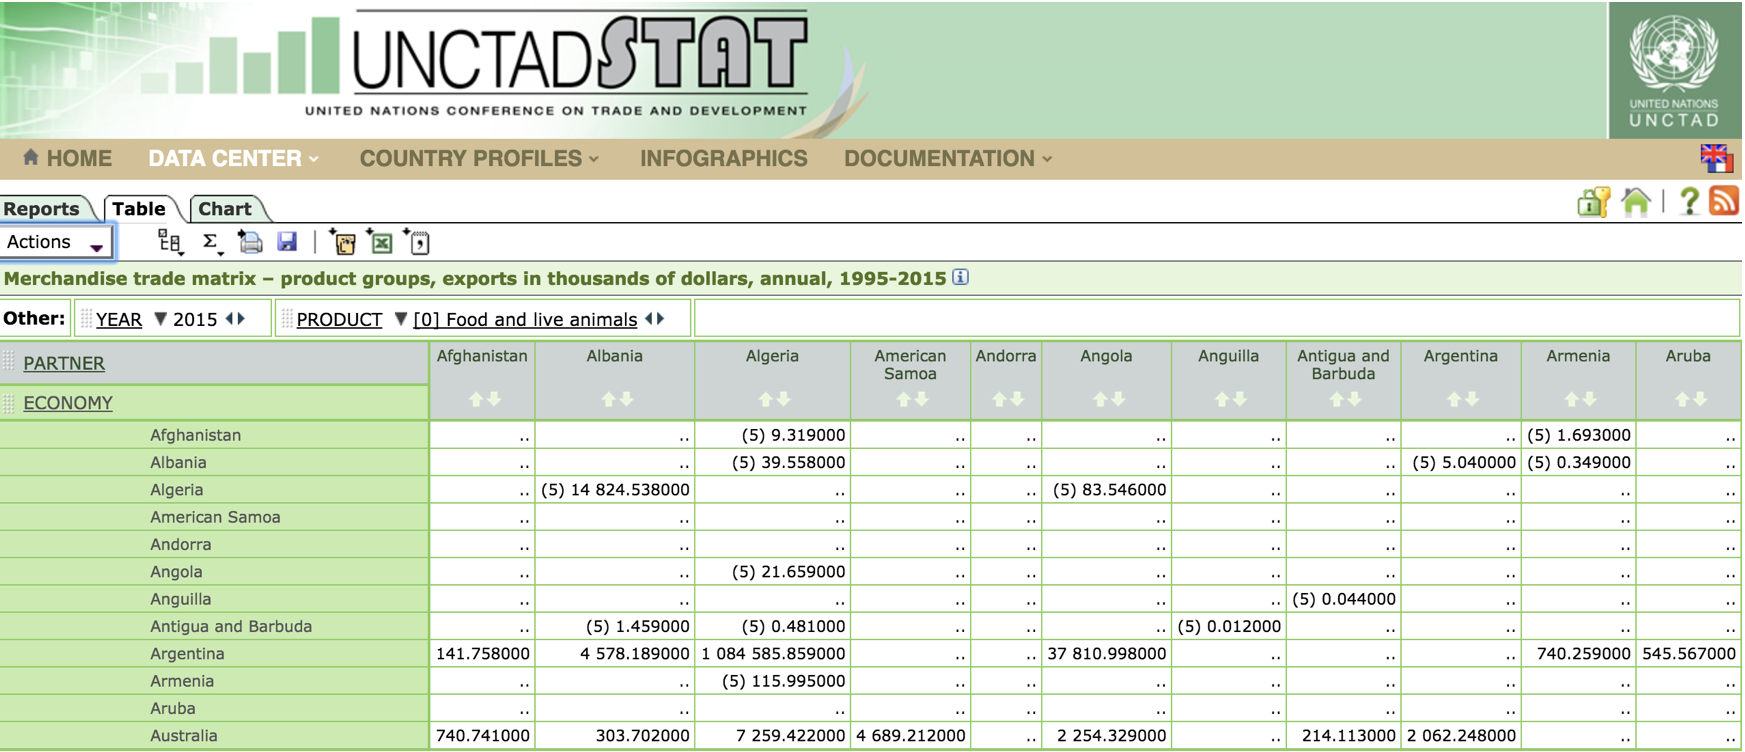

In [5]:
#let's view the source data
from IPython.display import Image
Image("UNCTAD.png")

# Data cleaning steps:
1) Read the excel file  
2) Remove the space before the country names  
3) Destring the numbers, because empty cells contain ".."  
4) Pivot/Reshape the data into three columns: Source, Partner and Volume

&nbsp;&nbsp;&nbsp;&nbsp;At this point, we now have a directed graph with overlapping edges, such that  
<pre><code>Source   Target     Exports
Algeria  Albania     14 824
Albania  Algeria         39
</code></pre>

&nbsp;&nbsp;&nbsp;&nbsp; To reduce the number of edges, we compute net exports.  This also then makes the graph two way/undirected.  
&nbsp;&nbsp;&nbsp;&nbsp; The volume of net exports then become the edge weights.

5) Normalize the edge weights between 0 and 1 for analysis  
6) Repeat each step for all 10 trading sectors:  
&nbsp;&nbsp;&nbsp;&nbsp; Food  
&nbsp;&nbsp;&nbsp;&nbsp; Beverages / Tobacco  
&nbsp;&nbsp;&nbsp;&nbsp; Crude  
&nbsp;&nbsp;&nbsp;&nbsp; Mineral Fuels  
&nbsp;&nbsp;&nbsp;&nbsp; Animal and Vegetable Oils  
&nbsp;&nbsp;&nbsp;&nbsp; Chemicals  
&nbsp;&nbsp;&nbsp;&nbsp; Manufacturing  
&nbsp;&nbsp;&nbsp;&nbsp; Machinery  
&nbsp;&nbsp;&nbsp;&nbsp; Miscellaneous Manufacturing Goods  
&nbsp;&nbsp;&nbsp;&nbsp; Commodities 

** Data cleaning was done using STATA. **

In [23]:
os.chdir('/Users/Carla/Documents/Network Analysis/trade-networks/Clusters')
dfedges = pd.read_csv("SITC0 [Edges].csv", sep = ",")
dfedges = dfedges[['Source', 'Target', 'weight']]
dfedges.head(20)
#dfedges.shape (1228,3)

#Below sample for SITC0 (Food)

Source               Target  weight
0     Algeria            Lithuania    0.01
1   Argentina            Australia    0.02
2   Argentina              Belgium    0.01
3   Argentina              Bolivia    0.01
4   Argentina               Brazil    0.18
5   Argentina               Canada    0.01
6   Argentina                Chile    0.07
7   Argentina                China    0.05
8   Argentina     ChinaHongKongSAR    0.01
9   Argentina             Colombia    0.01
10  Argentina                 Cuba    0.02
11  Argentina              Denmark    0.02
12  Argentina                Egypt    0.06
13  Argentina               France    0.02
14  Argentina              Germany    0.04
15  Argentina            Indonesia    0.09
16  Argentina  IranIslamicRepublic    0.03
17  Argentina              Ireland    0.02
18  Argentina               Israel    0.02
19  Argentina                Italy    0.07

# Data visualization:
1) Import CSV in Gephi as an edge graph, then save as GEXF  
2) Also import the nodes CSV which includes some other fixed groups such as income, region, etc. 
3) Open GEXF file as "undirected graph"
* Edges with 0.00 weights were deleted
* Filter by the "giant component" - to remove nodes with no edges  

4) Run Force Atlas graph layout  
5) Click on statistics and run all computations  
6) Partition the graph by modularity class  
7) Resize nodes by degree  


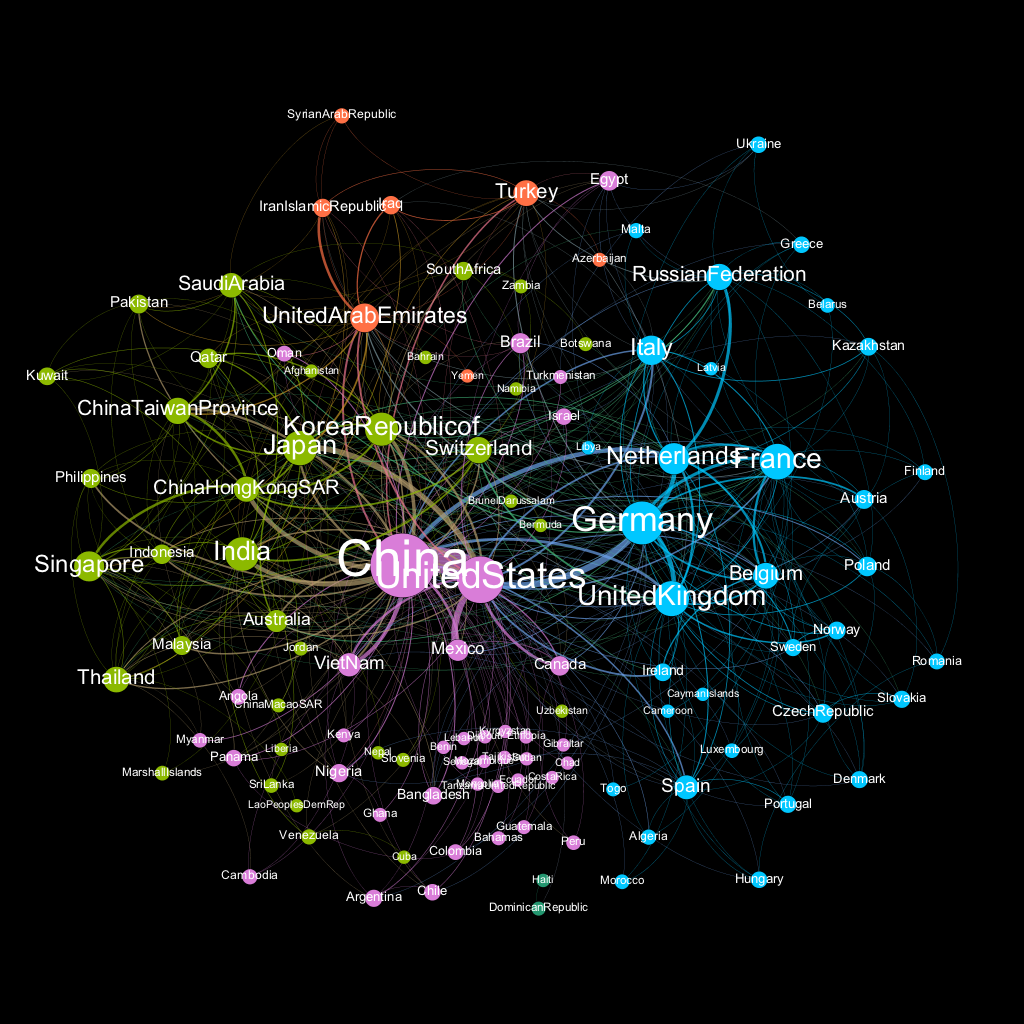

In [14]:
# All goods
os.chdir('/Users/Carla/Documents/Network Analysis/trade-networks')
Image("All.png")

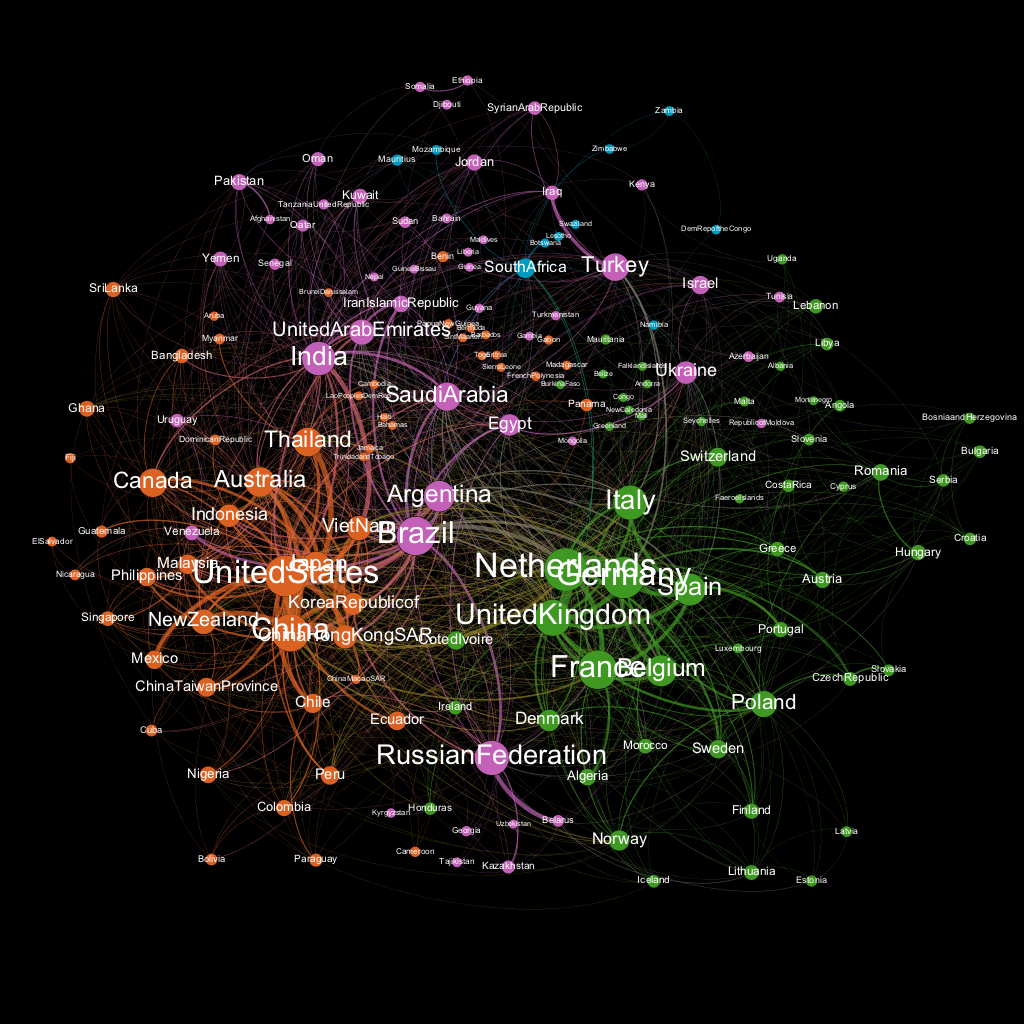

In [13]:
# SITC 0: Food
Image("SITC0.png")

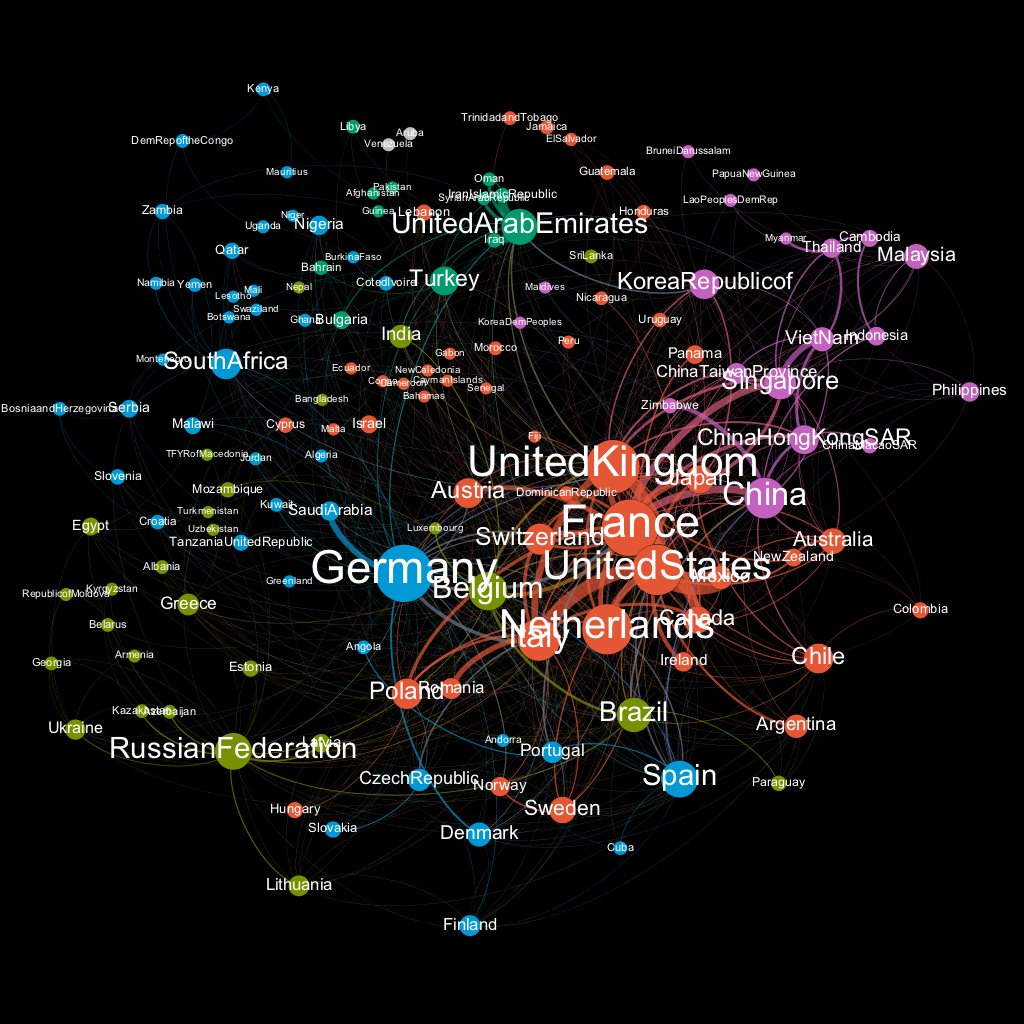

In [12]:
# SITC 1: Beverages and Tobacco
Image("SITC1.png")

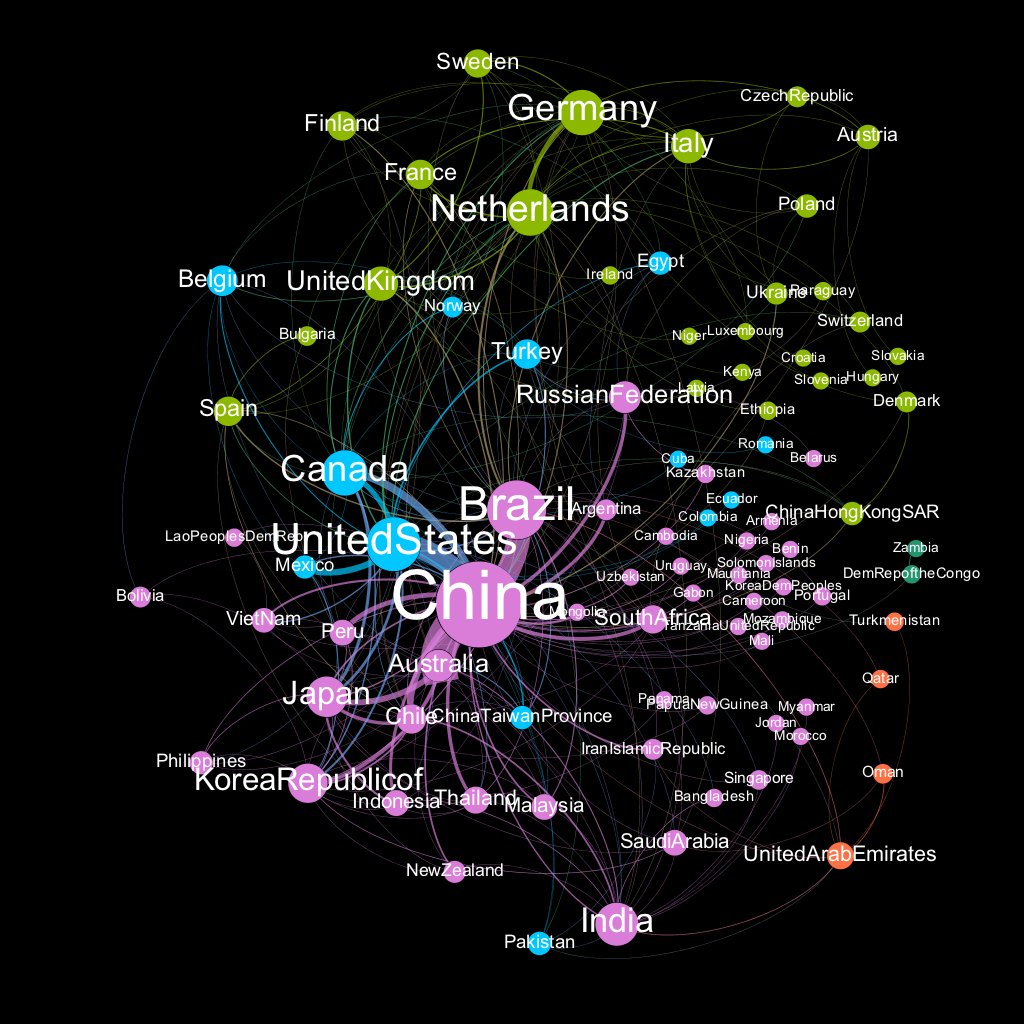

In [15]:
# SITC 2: Crude
Image("SITC2.png")

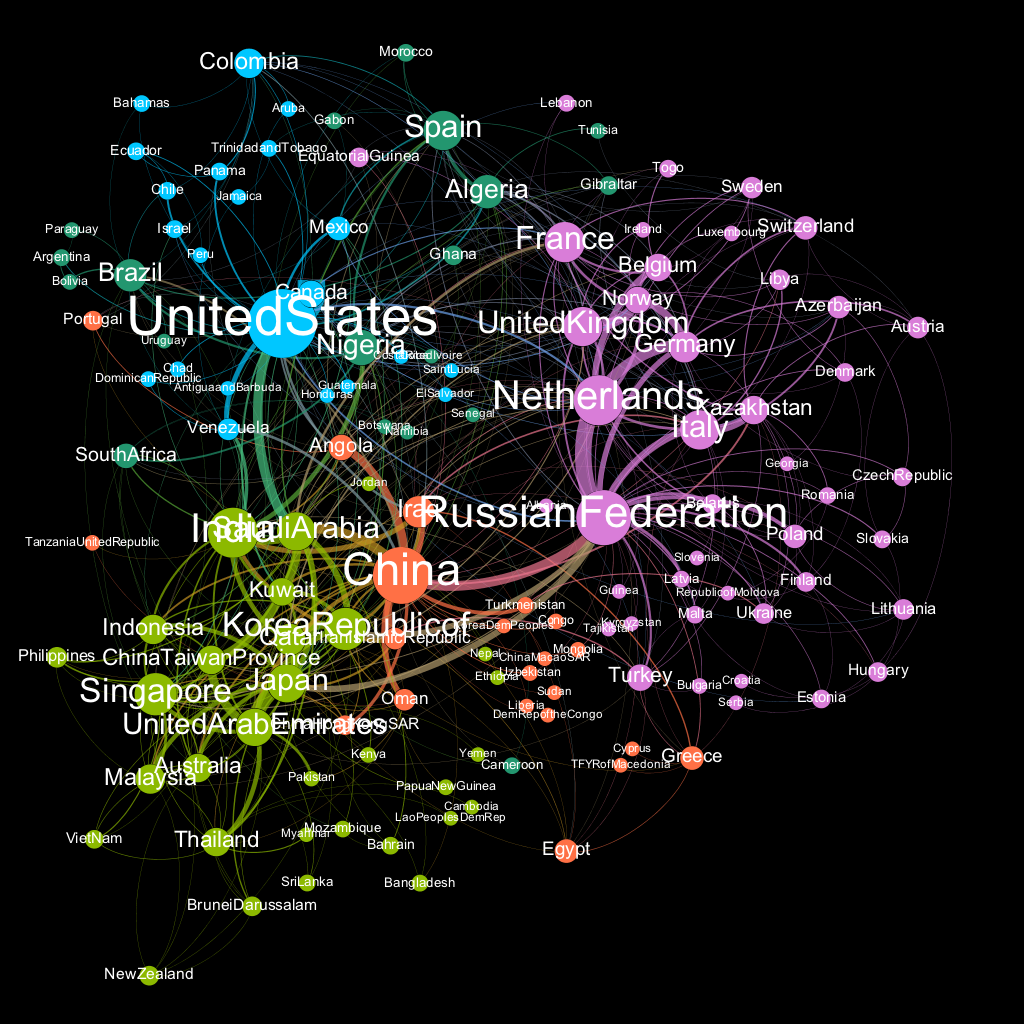

In [16]:
# SITC 3: Mineral Fuels
Image("SITC3.png")

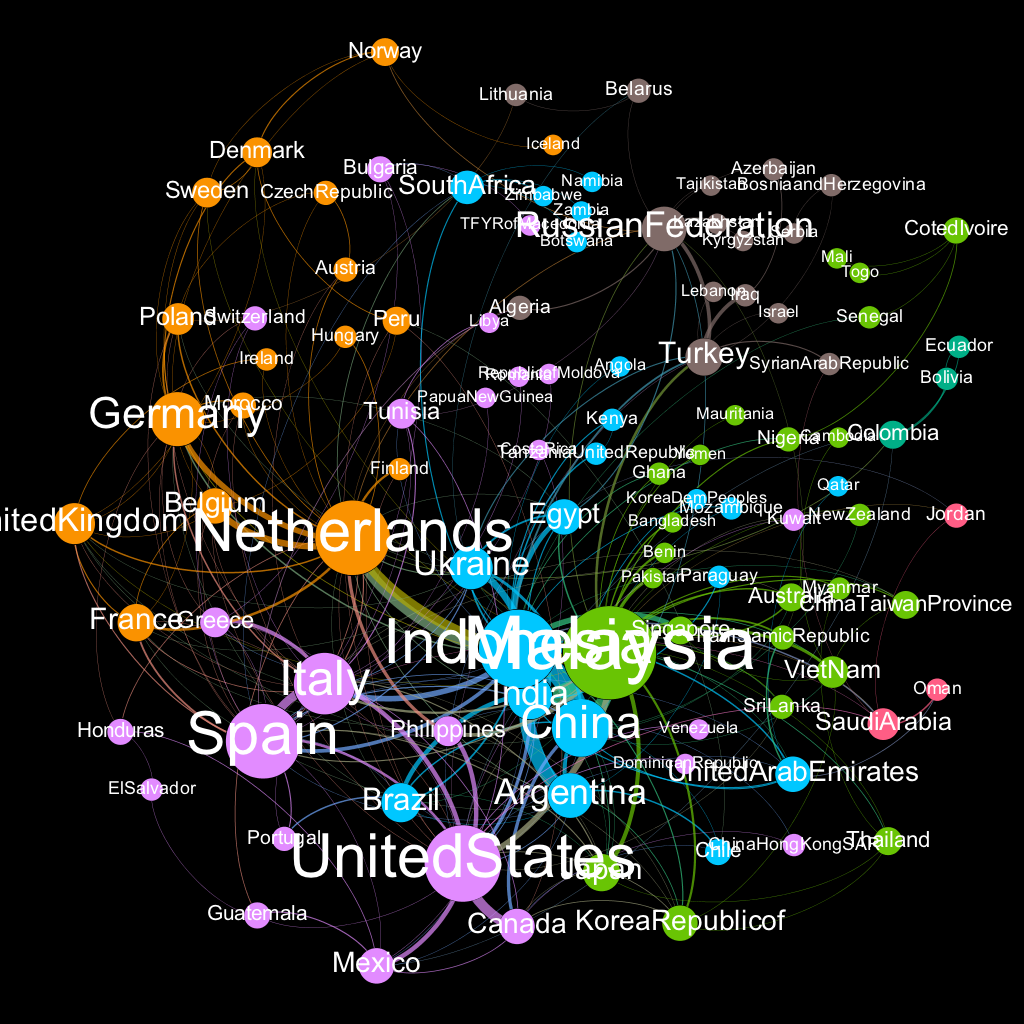

In [17]:
#SITC 4: Animal and Vegetable Oils  
Image("SITC4.png")

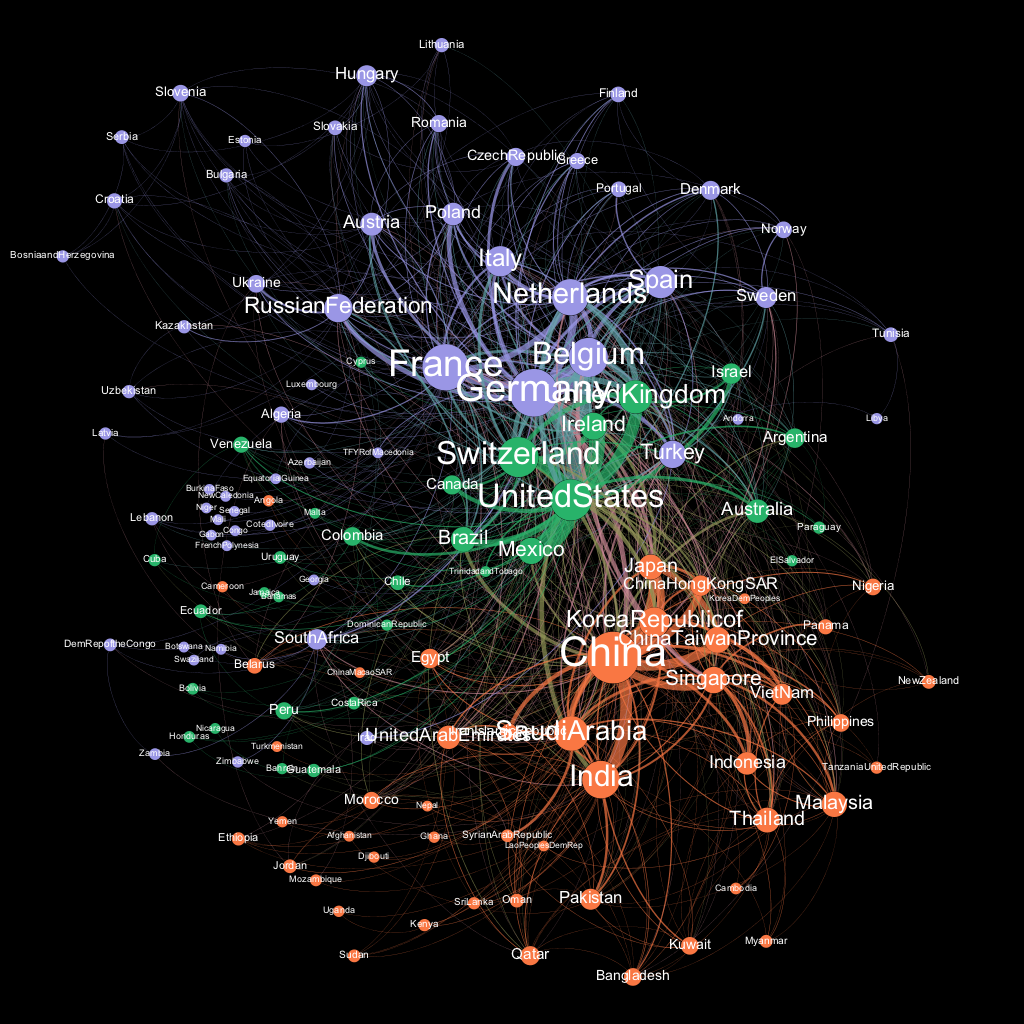

In [18]:
#SITC 5: Chemicals  
Image("SITC5.png")

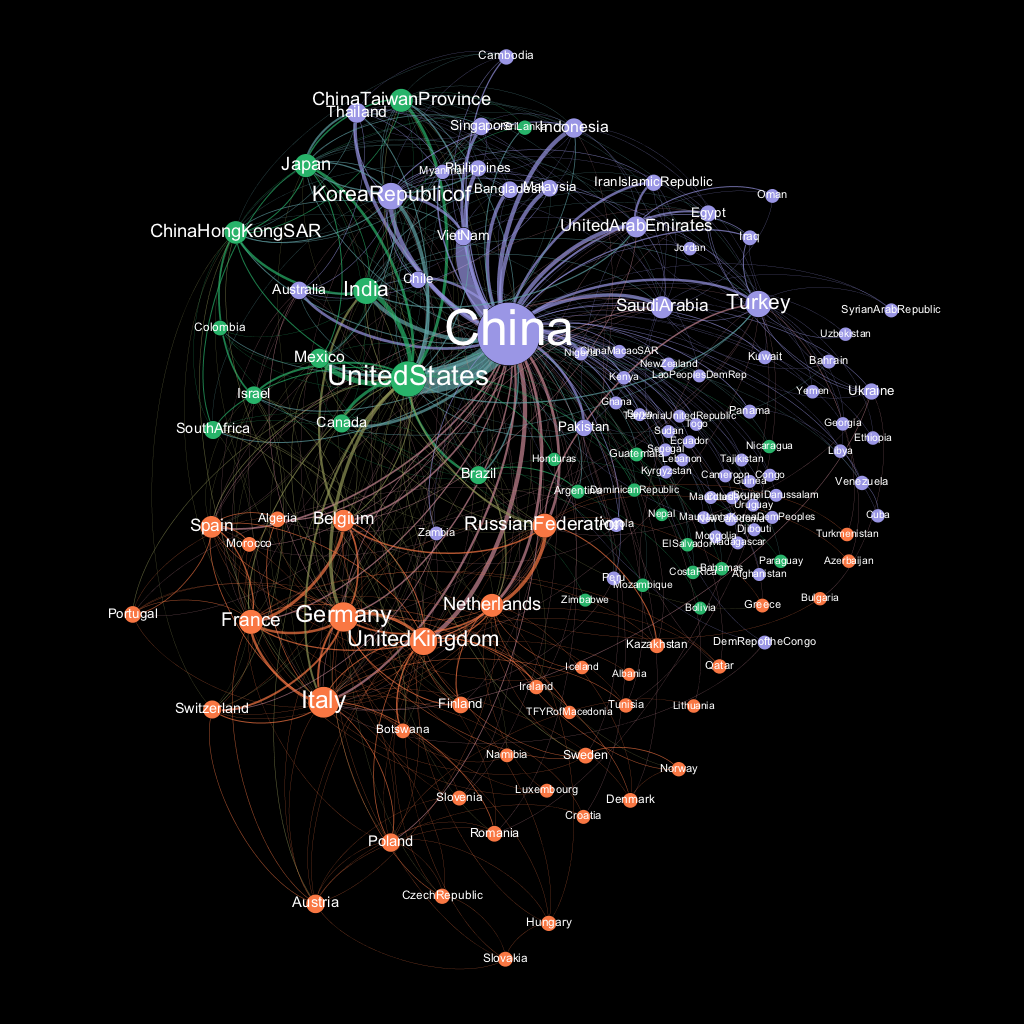

In [19]:
#SITC 6: Manufacturing
Image("SITC6.png")

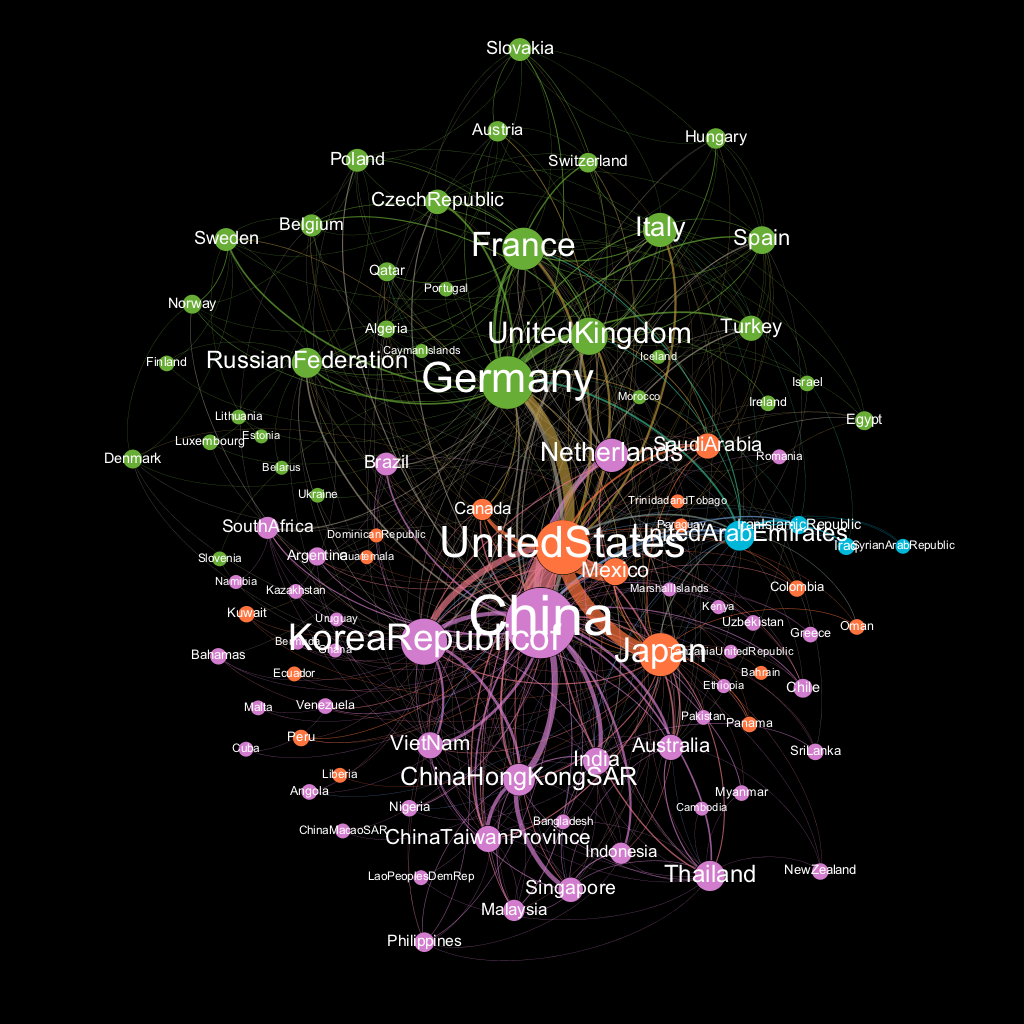

In [20]:
#SITC 7: Machinery 
Image("SITC7.png")

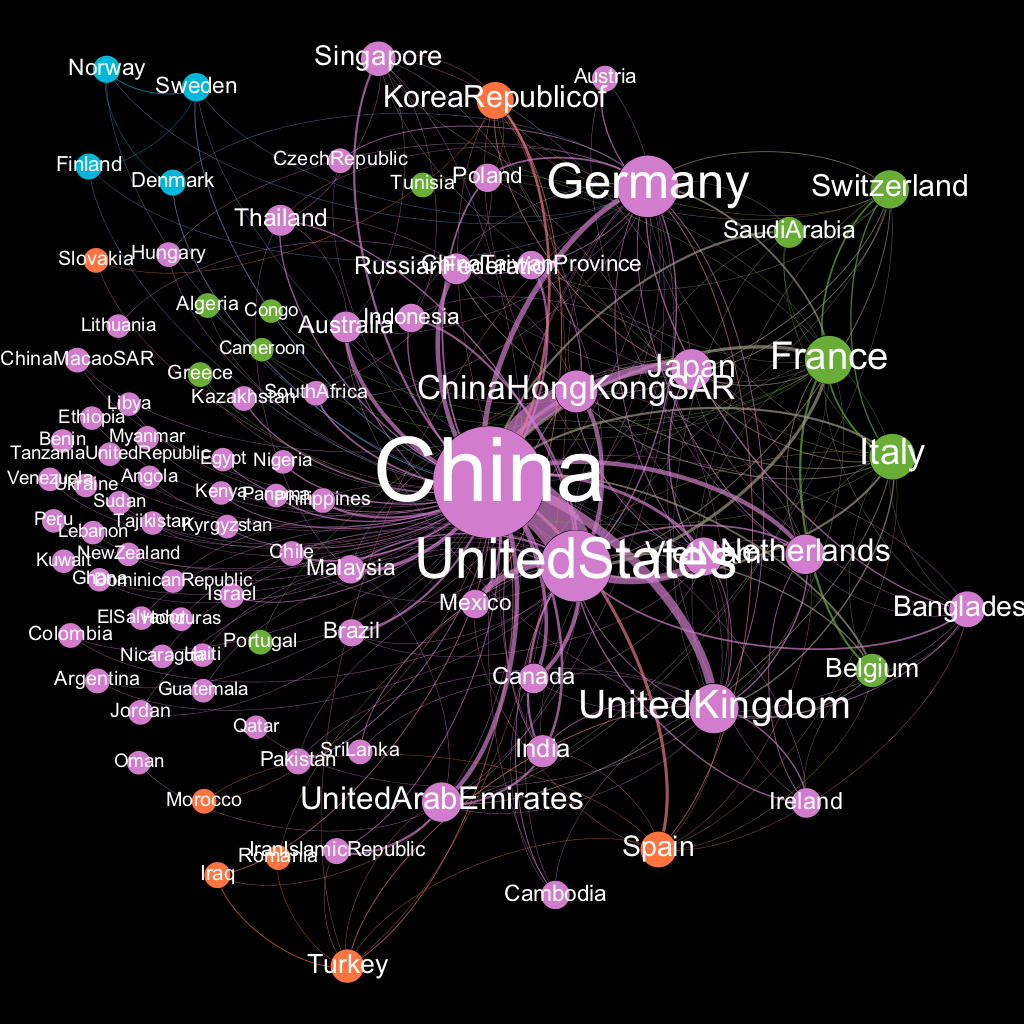

In [21]:
#SITC 8: Miscellaneous Manufacturing Goods
Image("SITC8.png")

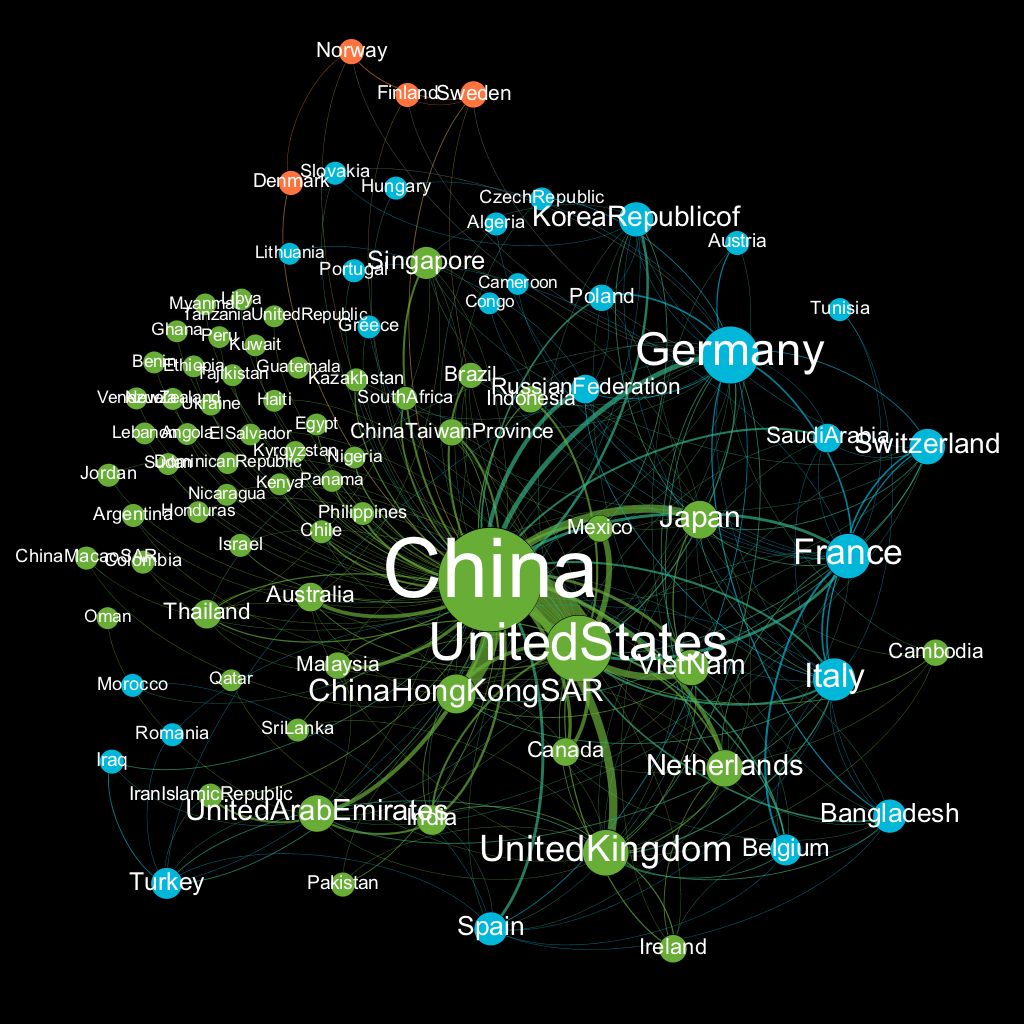

In [22]:
#SITC 9 :Commodities
Image("SITC9.png")

# Community detection

After creating the gephi visualizations, we have to export the data laboratory to a csv file.  This ensures that the dataset that we are using for the algorithm is the same as the visualization.  Remember that we had cleaned it up, removed edges with weight=0 and removed nodes with no degrees.

# Game plan:  
1) Create a loop for all SITC files (guidelines below):  
2) Get the best partition for each node.  
3) Once each node is assigned to a cluster, we have to compute each node's distance to the cluster centroid  
4) Then we do a ranked weighting:  Probabilility of belonging to a community based on minimum distance  

We can use shortest paths or highest centralities as the distance measure

In [4]:
os.chdir('/Users/Carla/Documents/Network Analysis/trade-networks/Clusters')
dfedges = pd.read_csv("SITC0 [Edges].csv", sep = ",")
dfedges = dfedges[['Source', 'Target', 'weight']]
tuples = [tuple(x) for x in dfedges.values]

G=nx.Graph() 
G.add_weighted_edges_from(tuples)

In [19]:
#Import the community detection API
# Documentation: http://perso.crans.org/aynaud/communities/api.html
import community
partition = community.best_partition(G)

In [32]:
community = pd.DataFrame(partition.items(), columns=['country', 'cluster'])
community.head()

country  cluster
0              Canada        0
1        NewCaledonia        1
2        Turkmenistan        2
3  UnitedArabEmirates        3
4           Lithuania        2

In [37]:
#compute centers and group by dictionary values

community.cluster.max()

4

In [38]:
community.cluster.value_counts()

1    60
0    43
3    41
2    14
4    10
Name: cluster, dtype: int64

In [ ]:
#create a subgraph using the cluster groupings
#then compute for the betweenness centrality


In [39]:
G = nx.Graph()   # or DiGraph, MultiGraph, MultiDiGraph, etc
G.add_path([0,1,2,3])
H = G.subgraph([0,1,2])
H.edges()

[(0, 1), (1, 2)]